In [1407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [1408]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1409]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318472 entries, 0 to 1318471
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1318472 non-null  int64  
 1   kWh       1318472 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 20.1 MB


In [1410]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1318467    0.14
1318468    0.14
1318469    0.14
1318470    0.14
1318471    0.14
Name: kWh, Length: 1318472, dtype: float64

In [1411]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1318467    0.14
1318468    0.14
1318469    0.14
1318470    0.14
1318471    0.14
Name: kWh, Length: 1318472, dtype: float64

In [1412]:
l=len(conso_data)-1
l

1318471

In [1413]:
conso_data['sec']=conso_data['Interval']/1000


In [1414]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1415]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1416]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318472 entries, 0 to 1318471
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1318472 non-null  int64  
 1   kWh        1318472 non-null  float64
 2   sec        1318472 non-null  float64
 3   Wh         1318472 non-null  float64
 4   cumul(ms)  1318472 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 50.3 MB


In [1417]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1318467,26224,0.14,26.224,137.278829,31082055865
1318468,26137,0.14,26.137,137.735777,31082082002
1318469,26332,0.14,26.332,136.715783,31082108334
1318470,26223,0.14,26.223,137.284064,31082134557
1318471,26150,0.14,26.150,137.667304,31082160707


In [1418]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

31082160707000

In [1419]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 13, 22, 291099)

In [1420]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1421]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [1422]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [1423]:
conso_data['dates']

0         2023-08-21 19:13:44.225099
1         2023-08-21 19:14:06.083099
2         2023-08-21 19:14:28.084099
3         2023-08-21 19:14:50.012099
4         2023-08-21 19:15:11.903099
                     ...            
1318467   2024-08-15 13:07:38.156099
1318468   2024-08-15 13:08:04.293099
1318469   2024-08-15 13:08:30.625099
1318470   2024-08-15 13:08:56.848099
1318471   2024-08-15 13:09:22.998099
Name: dates, Length: 1318472, dtype: datetime64[ns]

In [1424]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:13:44.225099,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:14:06.083099,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:14:28.084099,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:14:50.012099,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:15:11.903099,21/08/23
...,...,...,...,...,...,...,...
1318467,26224,0.14,26.224,137.278829,31082055865,2024-08-15 13:07:38.156099,15/08/24
1318468,26137,0.14,26.137,137.735777,31082082002,2024-08-15 13:08:04.293099,15/08/24
1318469,26332,0.14,26.332,136.715783,31082108334,2024-08-15 13:08:30.625099,15/08/24
1318470,26223,0.14,26.223,137.284064,31082134557,2024-08-15 13:08:56.848099,15/08/24


In [1425]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('15/08/24', 15, 8, 2024)

In [1426]:
here = now.strftime('%H:%M:%S')
here

'13:09:53'

In [1427]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1428]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 1316313 to 1318471
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2159 non-null   int64         
 1   kWh        2159 non-null   float64       
 2   sec        2159 non-null   float64       
 3   Wh         2159 non-null   float64       
 4   cumul(ms)  2159 non-null   int64         
 5   dates      2159 non-null   datetime64[ns]
 6   days       2159 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 134.9+ KB


In [1429]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [1430]:
data = list(df_grp['kWh'])
print(data)


[0.819, 3.7, 4.23, 3.674, 4.19, 4.603, 3.528, 3.417, 3.513, 3.69, 3.756, 3.812, 4.249, 3.793, 3.484, 3.636, 3.319, 3.383, 4.278, 4.009, 4.043, 3.931, 3.447, 4.444, 3.755, 3.76, 4.331, 4.703, 3.818, 3.224, 3.179, 3.989, 3.682, 3.158, 3.801, 4.13, 3.765, 3.578, 4.771, 4.196, 4.539, 3.775, 3.409, 4.305, 3.879, 3.857, 3.441, 4.08, 3.657, 3.399, 4.135, 3.385, 3.884, 3.834, 3.638, 3.759, 4.246, 3.299, 3.874, 2.987, 2.055, 2.041, 2.447, 4.089, 3.72, 4.332, 3.611, 3.926, 3.742, 3.905, 4.002, 4.105, 3.655, 3.155, 3.805, 3.509, 3.625, 3.709, 3.685, 3.241, 3.878, 3.235, 3.795, 3.611, 4.079, 3.564, 3.386, 3.817, 4.065, 4.328, 4.136, 3.998, 4.234, 3.742, 3.93, 3.86, 3.915, 3.738, 4.049, 4.346, 3.885, 3.505, 3.683, 3.667, 3.349, 3.847, 3.998, 4.101, 3.476, 4.175, 3.605, 4.064, 4.543, 3.679, 3.435, 3.579, 4.155, 3.702, 4.087, 3.98, 3.746, 3.591, 5.126, 3.702, 3.765, 4.288, 4.107, 4.699, 4.407, 3.993, 3.768, 4.359, 4.687, 4.194, 4.792, 4.315, 3.731, 4.171, 3.702, 3.651, 3.531, 3.936, 3.681, 3.785, 3.5

In [1431]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1432]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1433]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [1434]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.306328
dtype: float64

In [1435]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.652277
dtype: float64

In [1436]:
last=df_grp.iloc[-1]['kWh']
last

2.159

In [1437]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 1316313 to 1318471
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2159 non-null   int64         
 1   kWh        2159 non-null   float64       
 2   sec        2159 non-null   float64       
 3   Wh         2159 non-null   float64       
 4   cumul(ms)  2159 non-null   int64         
 5   dates      2159 non-null   datetime64[ns]
 6   days       2159 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 134.9+ KB


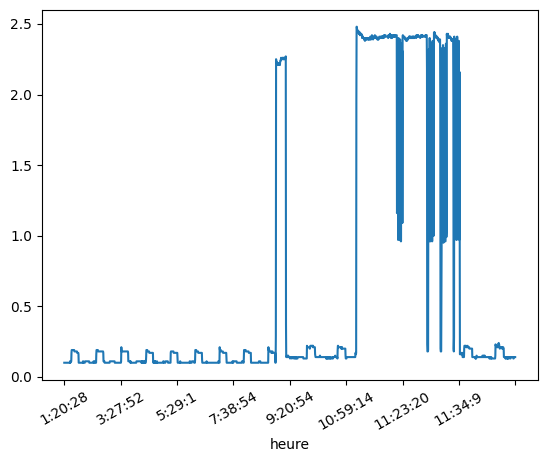

In [1438]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [1439]:
conso_day['heure']


1316313     0:0:16
1316314     0:0:40
1316315      0:1:4
1316316     0:1:29
1316317     0:1:55
            ...   
1318467    13:7:38
1318468     13:8:4
1318469    13:8:30
1318470    13:8:56
1318471    13:9:22
Name: heure, Length: 2159, dtype: object

In [1440]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:16',
              days   kWh
  heure                 
  0:0:16  15/08/24  0.14),
 ('0:0:40',
              days   kWh
  heure                 
  0:0:40  15/08/24  0.15),
 ('0:1:4',
             days   kWh
  heure                
  0:1:4  15/08/24  0.15),
 ('0:1:29',
              days   kWh
  heure                 
  0:1:29  15/08/24  0.14),
 ('0:1:55',
              days   kWh
  heure                 
  0:1:55  15/08/24  0.14),
 ('0:2:20',
              days   kWh
  heure                 
  0:2:20  15/08/24  0.14),
 ('0:2:45',
              days   kWh
  heure                 
  0:2:45  15/08/24  0.14),
 ('0:3:11',
              days   kWh
  heure                 
  0:3:11  15/08/24  0.14),
 ('0:3:37',
              days   kWh
  heure                 
  0:3:37  15/08/24  0.14),
 ('0:4:2',
             days   kWh
  heure                
  0:4:2  15/08/24  0.14),
 ('0:4:28',
              days   kWh
  heure                 
  0:4:28  15/08/24  0.14),
 ('0:4:54',
              day

In [1441]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:16',
  heure
  0:0:16    0.14
  Name: kWh, dtype: float64),
 ('0:0:40',
  heure
  0:0:40    0.15
  Name: kWh, dtype: float64),
 ('0:1:4',
  heure
  0:1:4    0.15
  Name: kWh, dtype: float64),
 ('0:1:29',
  heure
  0:1:29    0.14
  Name: kWh, dtype: float64),
 ('0:1:55',
  heure
  0:1:55    0.14
  Name: kWh, dtype: float64),
 ('0:2:20',
  heure
  0:2:20    0.14
  Name: kWh, dtype: float64),
 ('0:2:45',
  heure
  0:2:45    0.14
  Name: kWh, dtype: float64),
 ('0:3:11',
  heure
  0:3:11    0.14
  Name: kWh, dtype: float64),
 ('0:3:37',
  heure
  0:3:37    0.14
  Name: kWh, dtype: float64),
 ('0:4:2',
  heure
  0:4:2    0.14
  Name: kWh, dtype: float64),
 ('0:4:28',
  heure
  0:4:28    0.14
  Name: kWh, dtype: float64),
 ('0:4:54',
  heure
  0:4:54    0.14
  Name: kWh, dtype: float64),
 ('0:5:18',
  heure
  0:5:18    0.14
  Name: kWh, dtype: float64),
 ('0:5:45',
  heure
  0:5:45    0.13
  Name: kWh, dtype: float64),
 ('0:6:12',
  heure
  0:6:12    0.13
  Name: kWh, dtype: float64),

In [1442]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:16,26017,0.14,26.017,138.371065,31034814153,2024-08-15 00:00:16.444099,15/08/24
0:0:40,24211,0.15,24.211,148.692743,31034838364,2024-08-15 00:00:40.655099,15/08/24
0:1:4,24299,0.15,24.299,148.154245,31034862663,2024-08-15 00:01:04.954099,15/08/24
0:1:29,24696,0.14,24.696,145.772595,31034887359,2024-08-15 00:01:29.650099,15/08/24
0:1:55,25406,0.14,25.406,141.698811,31034912765,2024-08-15 00:01:55.056099,15/08/24
...,...,...,...,...,...,...,...
13:7:38,26224,0.14,26.224,137.278829,31082055865,2024-08-15 13:07:38.156099,15/08/24
13:8:4,26137,0.14,26.137,137.735777,31082082002,2024-08-15 13:08:04.293099,15/08/24
13:8:30,26332,0.14,26.332,136.715783,31082108334,2024-08-15 13:08:30.625099,15/08/24


In [1443]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [1444]:
df.iloc[0].dates

Timestamp('2024-08-15 00:00:16.444099')

In [1445]:
df.dates.dt.time

heure
0:0:16     00:00:16.444099
0:0:40     00:00:40.655099
0:1:4      00:01:04.954099
0:1:29     00:01:29.650099
0:1:55     00:01:55.056099
                ...       
13:7:38    13:07:38.156099
13:8:4     13:08:04.293099
13:8:30    13:08:30.625099
13:8:56    13:08:56.848099
13:9:22    13:09:22.998099
Name: dates, Length: 2159, dtype: object

In [1446]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [1447]:
tranches = len(df)//1000
tranches+1

3

In [1448]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-08-15 00:00:16.444099	2024-08-15 08:23:12.621099	8h 22m 56s 	1000
2024-08-15 08:23:12.621099	2024-08-15 12:05:49.589099	3h 42m 36s 	2000
2024-08-15 12:05:49.589099	2024-08-15 13:09:22.998099	1h 3m 33s 	159


In [1449]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('13:09:53', 2.159, 2159)

In [1450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 0:0:16 to 13:9:22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2159 non-null   int64         
 1   kWh        2159 non-null   float64       
 2   sec        2159 non-null   float64       
 3   Wh         2159 non-null   float64       
 4   cumul(ms)  2159 non-null   int64         
 5   dates      2159 non-null   datetime64[ns]
 6   days       2159 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 199.5+ KB


In [1451]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [1452]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 21/08/23 to 15/08/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     361 non-null    float64
dtypes: float64(1)
memory usage: 5.6+ KB


In [1453]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [1454]:
df_grp.tail(7)

,kWh
days,
09/08/24,3.616
10/08/24,4.042
11/08/24,3.700
12/08/24,4.370
13/08/24,4.362
14/08/24,3.592
15/08/24,2.159


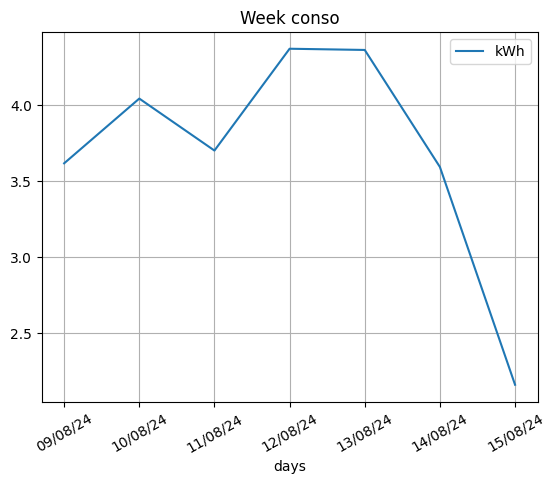

In [1455]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [1456]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [1457]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


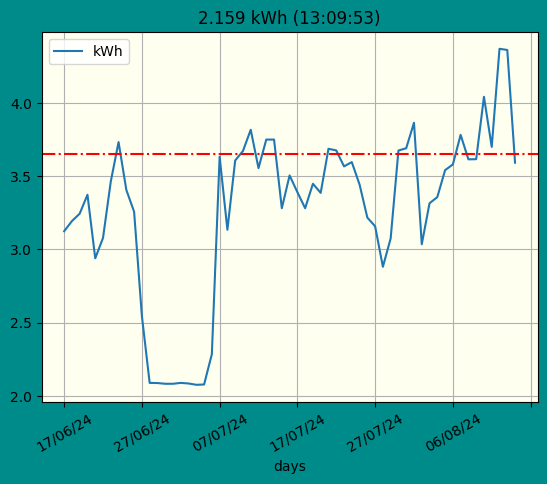

In [1458]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [1459]:
df_grp.mean()

kWh    3.652277
dtype: float64

In [1460]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
02/08/24,3.035
03/08/24,3.315
04/08/24,3.357
05/08/24,3.541
06/08/24,3.580
07/08/24,3.782
08/08/24,3.615
09/08/24,3.616
10/08/24,4.042


In [1461]:
df_grp

,kWh
days,
21/08/23,0.819
22/08/23,3.700
23/08/23,4.230
24/08/23,3.674
25/08/23,4.190
...,...
11/08/24,3.700
12/08/24,4.370
13/08/24,4.362


In [1462]:
df_grp.tail(100).mean()

kWh    3.37149
dtype: float64

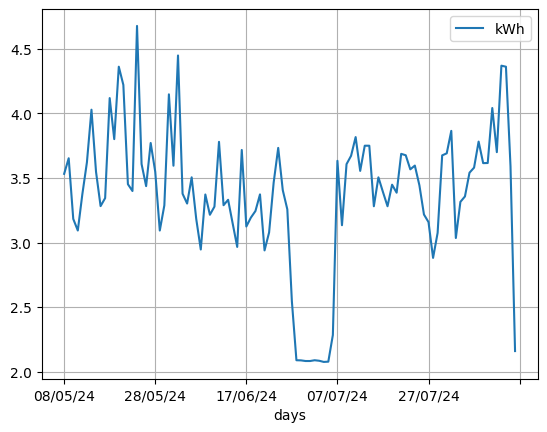

In [1463]:
df_grp.tail(100).plot()
plt.grid()

In [1464]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.548300
std,0.336155
min,2.881000
25%,3.364250
50%,3.573500
75%,3.684250
max,4.370000


In [1465]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

12/08/24 4.37
28/07/24 2.881


In [1466]:
day

'15/08/24'

In [1467]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1316313,26017,0.14,26.017,138.371065,31034814153,2024-08-15 00:00:16.444099,15/08/24,0:0:16
1316314,24211,0.15,24.211,148.692743,31034838364,2024-08-15 00:00:40.655099,15/08/24,0:0:40
1316315,24299,0.15,24.299,148.154245,31034862663,2024-08-15 00:01:04.954099,15/08/24,0:1:4
1316316,24696,0.14,24.696,145.772595,31034887359,2024-08-15 00:01:29.650099,15/08/24,0:1:29
1316317,25406,0.14,25.406,141.698811,31034912765,2024-08-15 00:01:55.056099,15/08/24,0:1:55
...,...,...,...,...,...,...,...,...
1318467,26224,0.14,26.224,137.278829,31082055865,2024-08-15 13:07:38.156099,15/08/24,13:7:38
1318468,26137,0.14,26.137,137.735777,31082082002,2024-08-15 13:08:04.293099,15/08/24,13:8:4
1318469,26332,0.14,26.332,136.715783,31082108334,2024-08-15 13:08:30.625099,15/08/24,13:8:30
1318470,26223,0.14,26.223,137.284064,31082134557,2024-08-15 13:08:56.848099,15/08/24,13:8:56


In [1468]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 1316313 to 1318471
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2159 non-null   int64         
 1   kWh        2159 non-null   float64       
 2   sec        2159 non-null   float64       
 3   Wh         2159 non-null   float64       
 4   cumul(ms)  2159 non-null   int64         
 5   dates      2159 non-null   datetime64[ns]
 6   days       2159 non-null   object        
 7   heure      2159 non-null   object        
 8   hours      2159 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 168.7+ KB


In [1469]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1316313    00  0.14
  1316314    00  0.15
  1316315    00  0.15
  1316316    00  0.14
  1316317    00  0.14
  ...       ...   ...
  1316431    00  0.10
  1316432    00  0.10
  1316433    00  0.10
  1316434    00  0.10
  1316435    00  0.10
  
  [123 rows x 2 columns]),
 ('01',
          hours   kWh
  1316436    01  0.10
  1316437    01  0.11
  1316438    01  0.10
  1316439    01  0.10
  1316440    01  0.10
  ...       ...   ...
  1316550    01  0.10
  1316551    01  0.10
  1316552    01  0.10
  1316553    01  0.10
  1316554    01  0.10
  
  [119 rows x 2 columns]),
 ('02',
          hours   kWh
  1316555    02  0.11
  1316556    02  0.11
  1316557    02  0.10
  1316558    02  0.10
  1316559    02  0.10
  ...       ...   ...
  1316668    02  0.10
  1316669    02  0.10
  1316670    02  0.10
  1316671    02  0.10
  1316672    02  0.10
  
  [118 rows x 2 columns]),
 ('03',
          hours   kWh
  1316673    03  0.10
  1316674    03  0.11
  1316675    03  0.1

In [1470]:
groupedbyhour.count()

,kWh
hours,
00,123
01,119
02,118
03,118
04,119
05,117
06,116
07,116
08,116


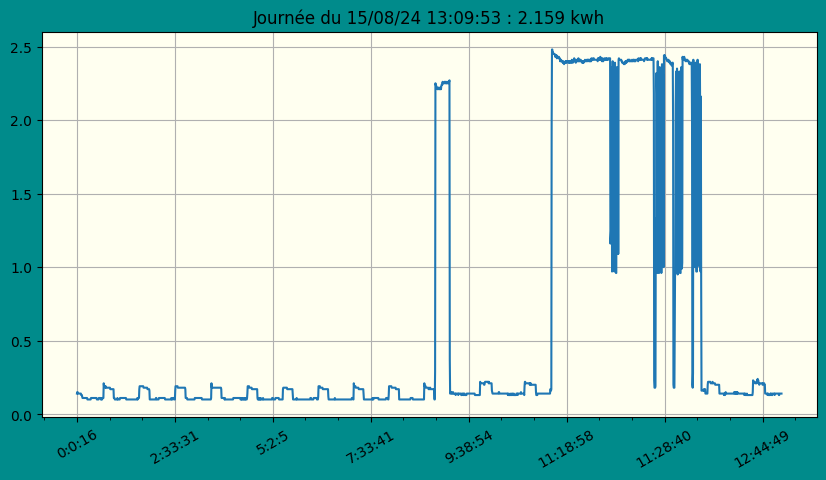

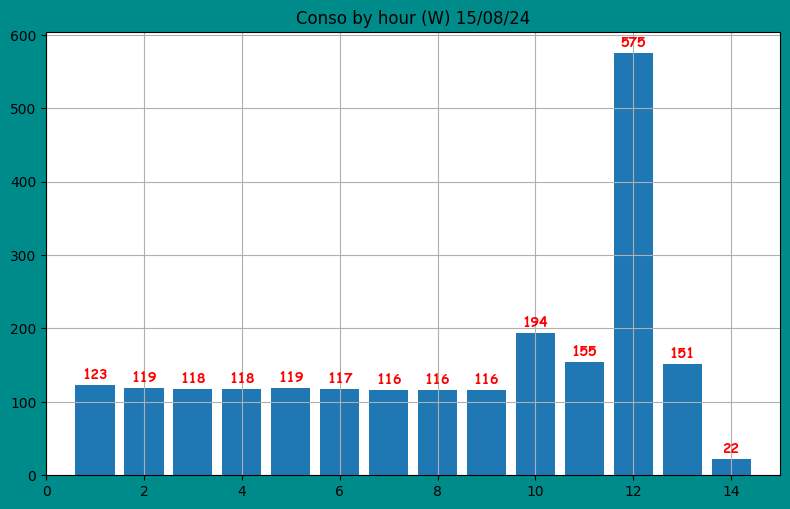

In [1471]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [1472]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [1473]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1474]:
#conso_byhour(day)

In [1475]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

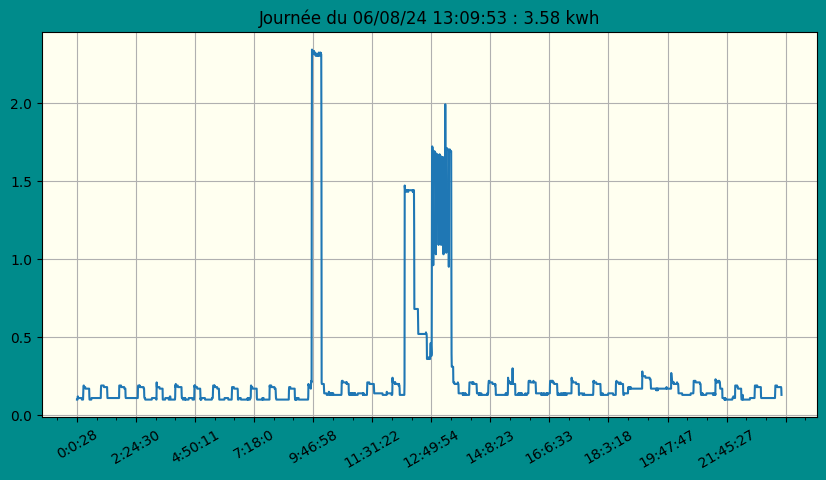

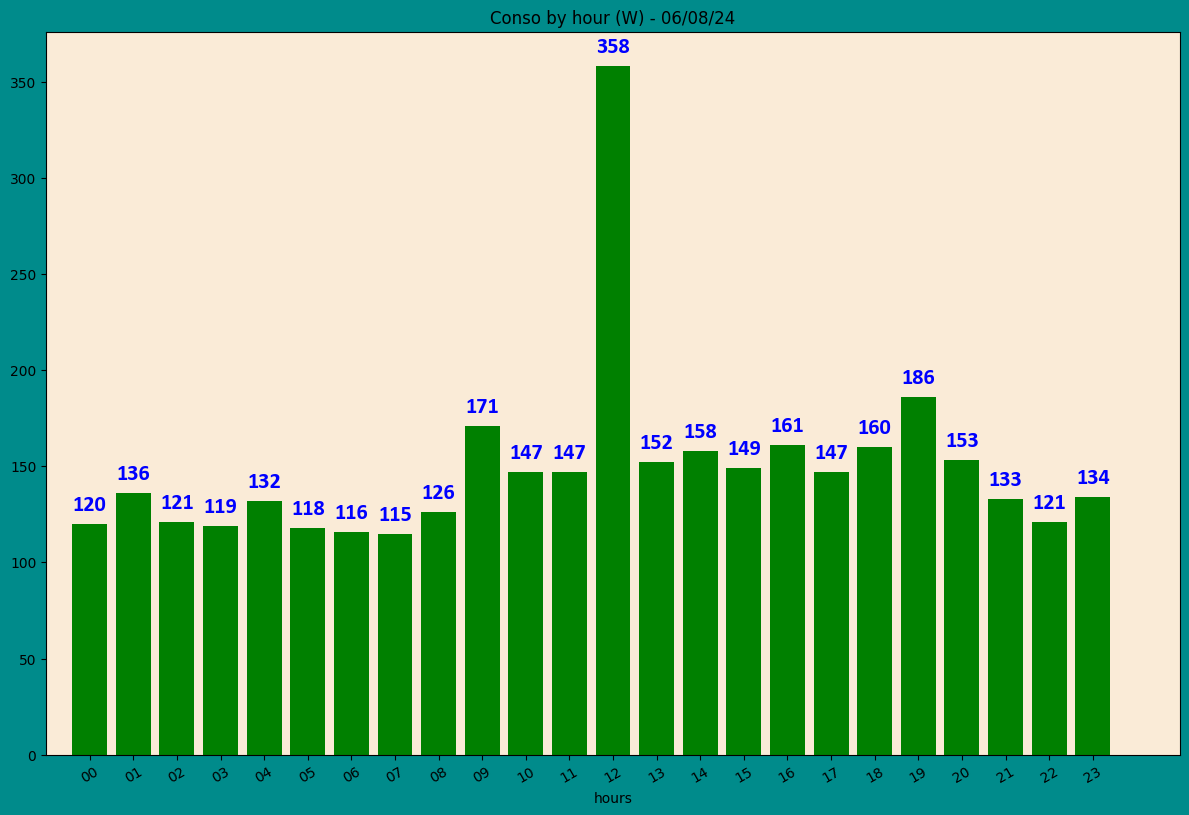

In [1476]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1477]:
month

days
16/07/24    3.505
17/07/24    3.391
18/07/24    3.281
19/07/24    3.448
20/07/24    3.386
21/07/24    3.687
22/07/24    3.676
23/07/24    3.567
24/07/24    3.596
25/07/24    3.443
26/07/24    3.217
27/07/24    3.158
28/07/24    2.881
29/07/24    3.075
30/07/24    3.675
31/07/24    3.691
01/08/24    3.865
02/08/24    3.035
03/08/24    3.315
04/08/24    3.357
05/08/24    3.541
06/08/24    3.580
07/08/24    3.782
08/08/24    3.615
09/08/24    3.616
10/08/24    4.042
11/08/24    3.700
12/08/24    4.370
13/08/24    4.362
14/08/24    3.592
Name: kWh, dtype: float64

In [1478]:
month.idxmax()

'12/08/24'

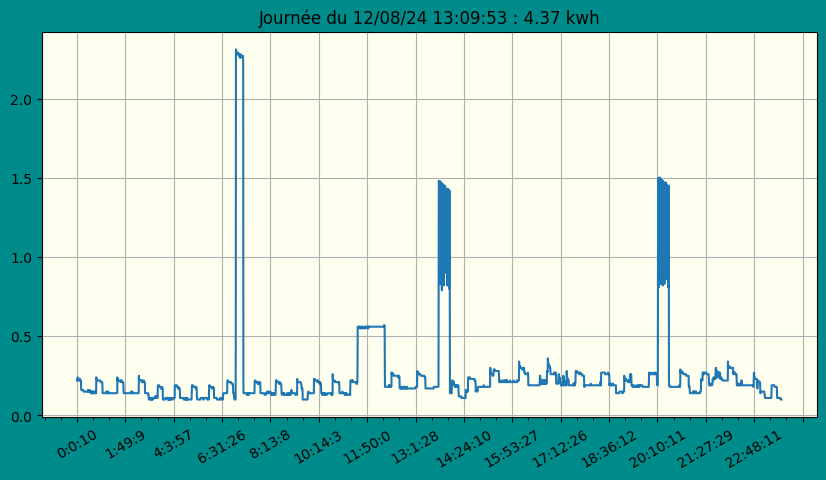

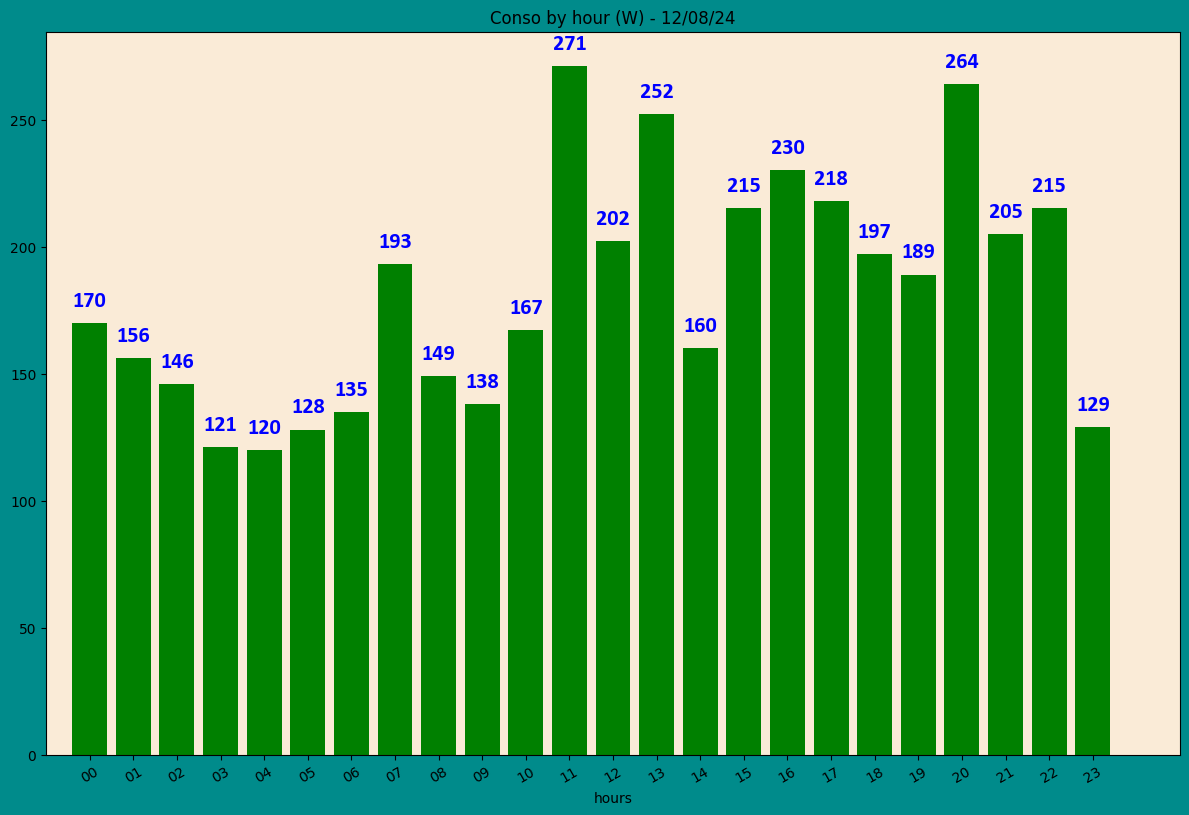

In [1479]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1480]:
filename='conso_data.csv'
#conso_data.to_csv(filename)